**【問題1】データの取得**

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [3]:
# irisデータセットの読み込み
iris = load_iris()

# 説明変数
X = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

# 目的変数
y = pd.DataFrame(iris.target, columns=['Species'])
species_dict = {0:"setosa", 1:"versicolor", 2:"virginica"}


**【問題2】データの結合**

In [4]:
# 問題1で準備したX,yを結合
df = X.join(y)

**【問題3】データの確認**

In [5]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
print(df.head(4))
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species           int64
dtype: object


In [6]:
# ラベルごとのサンプル数の合計を出力する。
i = 0

while i < len(species_dict):

  df_bool = df[df.columns[4]]==i
  
  print( "'{}'の合計数:{}".format( species_dict[i], df_bool.sum()))
  i += 1

'setosa'の合計数:50
'versicolor'の合計数:50
'virginica'の合計数:50


In [7]:
# 特徴量に欠損値があるかを確認する。
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [8]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df_ave = df.mean()[0:4]
df_ave.name = '平均値'

df_std = df.std(numeric_only=True)[0:4]
df_std.name = '標準偏差'

df_quantile = df.quantile(0.25)[0:4]
df_quantile.name = '四分位数'

print(pd.concat([df_ave, df_std, df_quantile], axis=1))

                   平均値      標準偏差  四分位数
sepal_length  5.843333  0.828066   5.1
sepal_width   3.057333  0.435866   2.8
petal_length  3.758000  1.765298   1.6
petal_width   1.199333  0.762238   0.3


**【問題4】irisデータセット自体の調査**

データセットに含まれるアヤメの種類

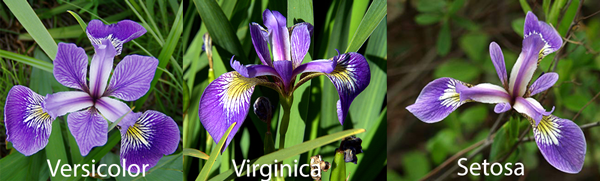

特徴量の意味

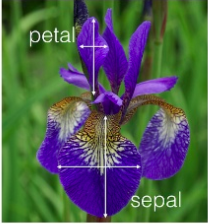

**【問題5】必要なデータを抽出**

In [9]:
# sepal_widthの列を３つの異なる方法で抽出する
print( df['sepal_width'])

print( df.iloc[:,1])

print( df.loc[:,'sepal_width'])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [10]:
# 50番目から99番目までのデータを抽出する
print( df.iloc[50:100,:])

    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
57           4.9          2.4           3.3          1.0        1
58           6.6          2.9           4.6          1.3        1
59           5.2          2.7           3.9          1.4        1
60           5.0          2.0           3.5          1.0        1
61           5.9          3.0           4.2          1.5        1
62           6.0          2.2           4.0          1.0        1
63           6.1          2.9           4.7          1.4        1
64        

In [11]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
print( df.iloc[50:100,2])


50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64


In [12]:
# petal_widthの値が0.2のデータを抽出する
print( df[df['petal_width'] == 0.2])

    sepal_length  sepal_width  petal_length  petal_width  Species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
7            5.0          3.4           1.5          0.2        0
8            4.4          2.9           1.4          0.2        0
10           5.4          3.7           1.5          0.2        0
11           4.8          3.4           1.6          0.2        0
14           5.8          4.0           1.2          0.2        0
20           5.4          3.4           1.7          0.2        0
22           4.6          3.6           1.0          0.2        0
24           4.8          3.4           1.9          0.2        0
25           5.0          3.0           1.6          0.2        0
27        

**.locや.ilocの違いについて**

.locと.ilocはどちらもDataFrameの行・列のデータを参照するために使用する点では同じだが、行・列の指定方法が異なる。

*   .**loc**　⇨　
行ラベル、 列ラベルにて指定
*   .**iloc**　⇨ 
行の番号(0 ~ )、列の番号(0 ~ )にて指定

**【問題6】図の作成**

([<matplotlib.patches.Wedge at 0x7f29232e7198>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

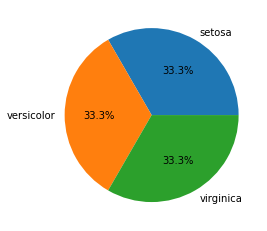

In [13]:
import matplotlib.pyplot as plt

# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
count_label = []

i = 0
while i < len(species_dict):

  df_bool = df[df.columns[4]]==i
  count_label.append( df_bool.sum() )

  i += 1

x = np.array(count_label)
plt.pie(x, labels=species_dict.values(), autopct="%.1f%%")

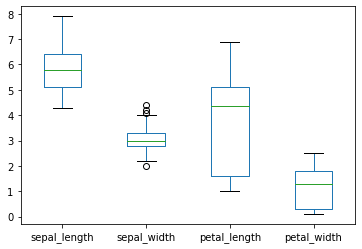

In [14]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
Z = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

Z.plot.box()

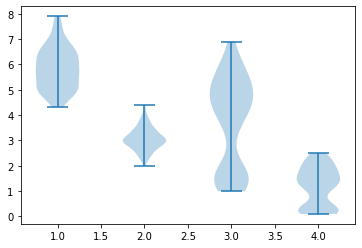

In [15]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
fig, axes = plt.subplots()

axes.violinplot(dataset = [df.iloc[:,0],
                           df.iloc[:,1],
                           df.iloc[:,2],
                           df.iloc[:,3]
                           ]
                )

plt.show()

**箱ひげ図とバイオリン図**

バイオリン図には箱ひげ図よりも多くの情報が含まれる。箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはすべての分布データが含まれる。しかし、、バイオリン図はよりマイナーである点が欠点である。知名度が低いため、バイオリン図を知らない人にとっては意味が理解しづらい。

**【問題7】特徴量間の関係の確認**

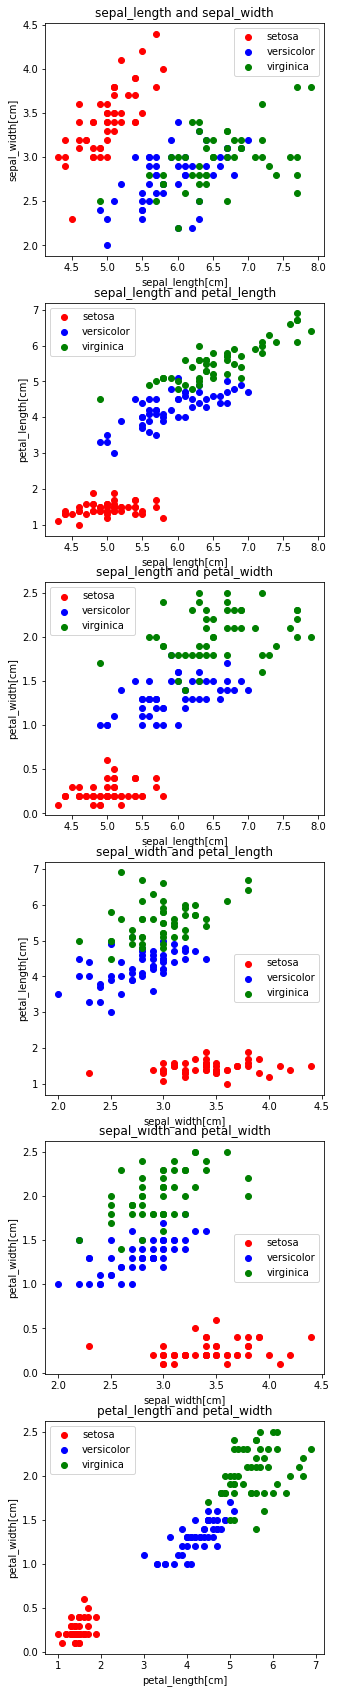

In [16]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

import itertools
combinations = list(itertools.combinations(df.columns[:4], 2)) 
fig, axes = plt.subplots(6, figsize=(5,30))
for i, comb in enumerate(combinations):
    axes[i].set_title(comb[0]+' and '+comb[1])
    axes[i].set(xlabel=comb[0]+'[cm]', ylabel=comb[1]+'[cm]')
    axes[i].scatter(df[df['Species']==0][comb[0]], df[df['Species']==0][comb[1]], c = 'red', label=load_iris().target_names[0])
    axes[i].scatter(df[df['Species']==1][comb[0]], df[df['Species']==1][comb[1]], c = 'blue', label=load_iris().target_names[1])
    axes[i].scatter(df[df['Species']==2][comb[0]], df[df['Species']==2][comb[1]], c = 'green', label=load_iris().target_names[2])
    axes[i].legend()
plt.show()

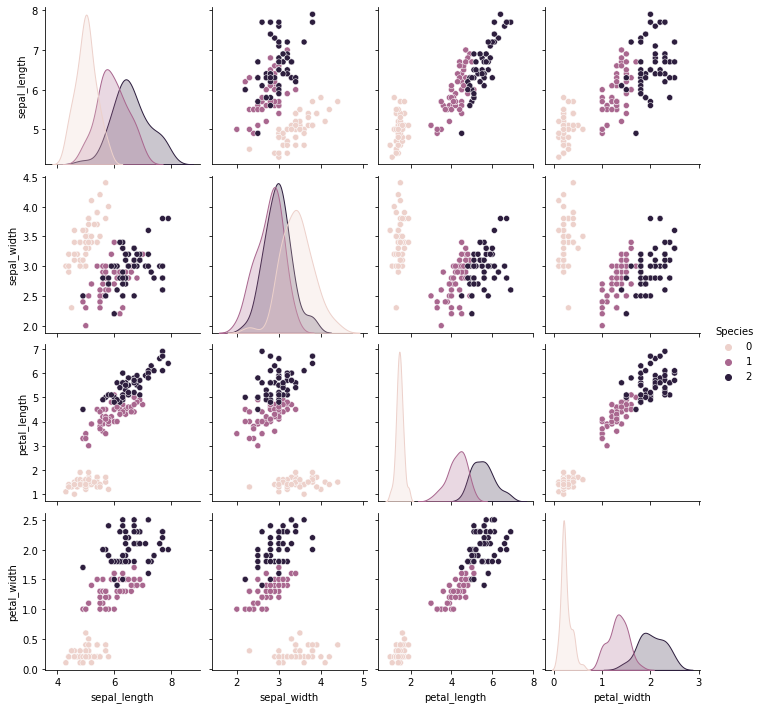

In [17]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

import seaborn as sns

sns.pairplot(df, hue='Species')

In [18]:
# ４つの特徴量に関する相関係数行列を作る

df.iloc[:, 0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


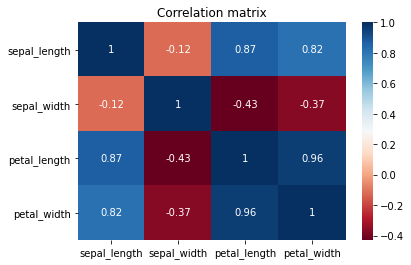

In [27]:
# 相関係数行列のヒートマップを作る

plt.title('Correlation matrix')
sns.heatmap(df.iloc[:, 0:4].corr(), cmap=colormap, annot=True)
plt.show()

【問題8】可視化したグラフや表の結果の説明

上記の図から0はpetal_lengthやpetal_widthが短い。

相関行列より、petal_wdithとpetal_lengthは相関が強い。